# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [3]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [5]:
df['mau'].value_counts()

False    16260
True       390
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [6]:
# Criei um DataFrame chamado metadados com os nomes das variáveis e tipo de dados de cada variável:
metadados = pd.DataFrame({'variavel':df.columns, 'tipo_dados':df.dtypes})


In [7]:
metadados.head()

,variavel,tipo_dados
sexo,sexo,object
posse_de_veiculo,posse_de_veiculo,object
posse_de_imovel,posse_de_imovel,object
qtd_filhos,qtd_filhos,int64
tipo_renda,tipo_renda,object


In [8]:
qtd_categorias = []
for variavel in df.columns:
    if df[variavel].dtype == 'object':
        qtd_categorias.append(df[variavel].nunique())
    else:
        qtd_categorias.append(0)
        
metadados['qtd_categorias'] = qtd_categorias

metadados

,variavel,tipo_dados,qtd_categorias
sexo,sexo,object,2
posse_de_veiculo,posse_de_veiculo,object,2
posse_de_imovel,posse_de_imovel,object,2
qtd_filhos,qtd_filhos,int64,0
tipo_renda,tipo_renda,object,5
educacao,educacao,object,5
estado_civil,estado_civil,object,5
tipo_residencia,tipo_residencia,object,6
idade,idade,float64,0
tempo_emprego,tempo_emprego,float64,0


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [9]:
df['tipo_renda'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [10]:
df['educacao'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [11]:
df['estado_civil'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [12]:
df['tipo_residencia'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [13]:
# Variaveis Dummies
df_encoded = pd.get_dummies(df, columns = ['tipo_renda','educacao', 'estado_civil', 'tipo_residencia'], drop_first = True)
df_encoded.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,M,Y,Y,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,F,N,Y,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,M,Y,Y,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,F,Y,N,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
# Mapping: Técnica de transformação de valores de uma variável em valores diferentes com base em uma determinada regra
#Iremos transformar as variaveis das colunas sexo, posse_de_veiculo e posse_de_imovel em respostas 0 ou 1.

df_encoded['sexo'].unique()

array(['M', 'F'], dtype=object)

In [15]:
df_encoded['sexo'] = df_encoded['sexo'].map({'M':0, 'F':1})

In [16]:
df_encoded['sexo'].unique()

array([0, 1], dtype=int64)

In [17]:
df_encoded['posse_de_veiculo'].unique()

array(['Y', 'N'], dtype=object)

In [18]:
df_encoded['posse_de_veiculo'] =df_encoded['posse_de_veiculo'].map({'Y':0, 'N':1})

In [19]:
df_encoded['posse_de_veiculo'].unique()

array([0, 1], dtype=int64)

In [20]:
df_encoded['posse_de_imovel'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
df_encoded['posse_de_imovel'] = df_encoded['posse_de_imovel'].map({'Y':0, 'N':1})

In [22]:
df_encoded['posse_de_imovel'].unique()

array([0, 1], dtype=int64)

In [23]:
#Mudando dados booleanos para dados numericos int

df_encoded.dtypes


sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8


In [24]:
df_encoded.mau = df_encoded.mau.astype(int)

In [25]:
df_encoded.dtypes

#agora todas as variaveis estao numericas e apropriadas para entrada no scikitlearn

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [26]:
freq = pd.crosstab(df_encoded['possui_email'], df_encoded['posse_de_veiculo'])
freq

posse_de_veiculo,0,1
possui_email,,
0,5829,9341
1,643,837


In [27]:
freq.sum(axis=1)

possui_email
0    15170
1     1480
dtype: int64

In [28]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

posse_de_veiculo,0,1
possui_email,,
0,0.384245,0.615755
1,0.434459,0.565541


<Axes: xlabel='possui_email'>

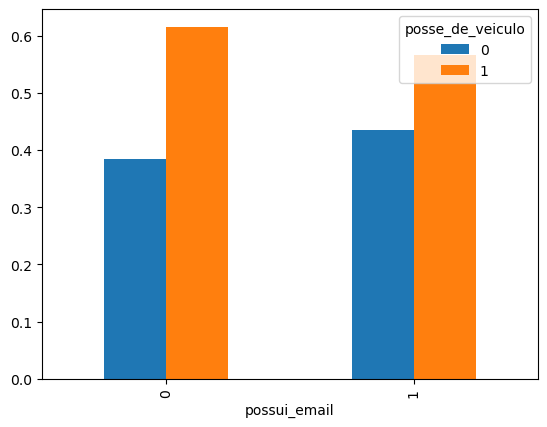

In [29]:
freq_pctlin.plot.bar()

# De acordo com as informaçoes da tabela cruzada e gráfico abaixo, a variavel mais poderosa entre as duas é a posse_de_veiculo

In [30]:
y = df_encoded.mau
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int32

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [31]:
df_encoded.to_csv('df_encoded_inadimplencia.csv')